In [1]:
# Copyright 2025 Quantinuum (www.quantinuum.com)
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import linregress
def func(x, a, b):
    return a * x**b
def lin_func(x,b,m):
    return m*x + b

In [9]:
level2_probs = [0.004, 0.00425, 0.0045000000000000005, 0.00475, 0.005, 0.00525, 0.0055, 0.00575, 0.006, 0.00625, 0.006500000000000001, 0.00675, 0.007, 0.00725, 0.0075, 0.00775, 0.008]
level2_curve_fit_probs = [0.004, 0.00425, 0.0045000000000000005, 0.00475, 0.005, 0.00525, 0.0055, 0.00575, 0.006, 0.00625, 0.006500000000000001, 0.00675, 0.007, 0.00725, 0.0075, 0.00775, 0.008, .05]
level2_logical_fails = [1.416984490199213e-07, 1.7867170281987e-07, 2.4077786877828533e-07, 2.871052113435891e-07, 3.3387752394590264e-07, 4.5310744631149966e-07, 5.170059306033037e-07, 6.965364319607832e-07, 7.601230260104771e-07, 9.547953244818715e-07, 9.83321628487998e-07, 1.1734852762068965e-06, 1.3564600732759732e-06, 1.6381826370212227e-06, 1.945784813927841e-06, 2.2308708970412546e-06, 2.4995839348943615e-06]
level2_errs = [1.7712306127490163e-08, 2.09119410695237e-08, 2.5522403045743195e-08, 2.9302552928571585e-08, 3.322205533013993e-08, 4.0690249872678794e-08, 4.569729993040721e-08, 5.576754645393145e-08, 6.125245898437038e-08, 7.217574232989293e-08, 7.701969412124002e-08, 8.845478086783743e-08, 9.99995633249123e-08, 1.1554849409985968e-07, 1.3239388731609782e-07, 1.490563316223825e-07, 1.6590321268901742e-07]
level2_totals = [451663377, 408570573, 369635301, 334372196, 302506137, 273665774, 247579365, 223965313, 202598783, 183285355, 165764685, 149980578, 135647192, 122696942, 111009192, 100409217, 90815114]
#The total number of shots per each point was 40,000,000*56


level1_probs = [.001, .002,.003, .004, .005, .006]
level1_curve_fit_probs = [.001, .002,.003, .004, .005, .006, .05]
level1_logical_fails = [1.3809114260907564e-05, 6.770843471284822e-05, 0.0001459222909735447, 0.0002647904579944105, 0.0004083169857177552, 0.0005964125868837357]
level1_totals = [10000000, 9776152, 9555678, 9340588, 9131749, 8926888, 8727180]
level1_errs = [1.1884993235193408e-06, 2.6618932412701445e-06, 3.952516681385526e-06, 5.38485709720854e-06, 6.76314471431638e-06, 8.266781015369343e-06]

In [10]:
log_probs = np.log(level2_probs)
log_fails = np.log(level2_logical_fails)
print(linregress(log_probs, log_fails))
log_probs = np.log(level1_probs)
log_fails = np.log(level1_logical_fails)
print(linregress(log_probs, log_fails))

LinregressResult(slope=4.123600374047059, intercept=7.0023237499836934, rvalue=0.9987450972592401, pvalue=6.344519562297902e-21, stderr=0.05339001219354351, intercept_stderr=0.27452949311462255)
LinregressResult(slope=2.0835034087679087, intercept=3.259760573266238, rvalue=0.9993459306688466, pvalue=6.415701273154367e-07, stderr=0.03769677832817028, intercept_stderr=0.2202476493717715)


In [11]:
level2_curve = []
for p in level2_curve_fit_probs:
    level2_curve.append(func(p, np.exp(7.0023), 4.12))
level1_curve = []
#for p in [0,.001,.002,.004,.008,.016,.032, .064]:
for p in level1_curve_fit_probs:
    level1_curve.append(func(p, np.exp(3.259760573266238), 2.0835034087679087))


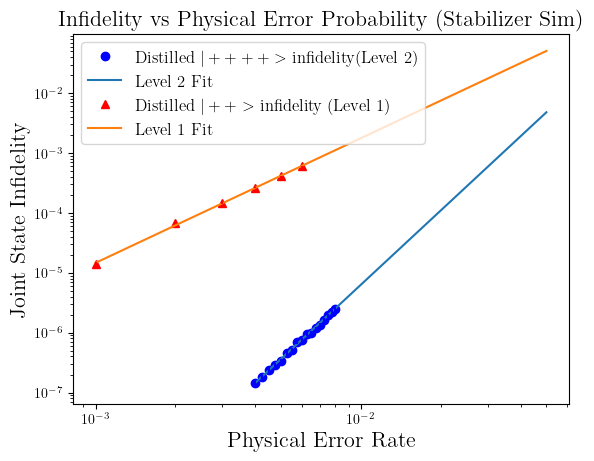

In [12]:
plt.plot(level2_probs, level2_logical_fails, 'bo', label = 'Distilled $|++++>$ infidelity(Level 2)')
# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = 'Computer Modern Roman'
#plt.rcParams["font.size"] = 18  # Default font size
plt.plot(level2_curve_fit_probs, level2_curve, label = 'Level 2 Fit')
plt.errorbar(level2_probs, level2_logical_fails, level2_errs, linestyle='none', color='b')


plt.plot(level1_probs, level1_logical_fails, 'r^', label = 'Distilled $|++>$ infidelity (Level 1)')
plt.plot(level1_curve_fit_probs, level1_curve, label = 'Level 1 Fit')
plt.errorbar(level1_probs, level1_logical_fails, level1_errs, linestyle='none', color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Physical Error Rate', fontsize = 16)
plt.ylabel('Joint State Infidelity', fontsize = 16)
plt.title('Infidelity vs Physical Error Probability (Stabilizer Sim)', fontsize=16)
plt.legend(fontsize=12)
plt.savefig("Level1StabSim.pdf", bbox_inches='tight')

In [7]:
print('level 1 constant: ', np.exp(3.259760573266238), ' uncertainty: ', np.exp(3.2597)*(0.220247649371771))
print('level 2 constant: ', np.exp(7.0023), 'uncertainty: ', np.exp(7.0023)*(.27452949311462255) )

level 1 constant:  26.043300933511663  uncertainty:  5.73562837622035
level 2 constant:  1099.1583175126166 uncertainty:  301.75137575945996
